# Descripcion - Contexto

Este es el proyecto final para el curso de data science. Para desarrollar este proyecto utiliza un dataset real que contiene la información de ventas desde 2021 hasta 2023 de una empresa que se dedica a ofrecer principalmente servicios de control de plagas ciudad de Cali. 
El proyecto tiene una parte de entendimiento, limpieza de datos, visualización y estimación de las ventas para el mes siguiente. 
Queremos revisar algunas hipótesis como es la aplicación de descuentos, conocer las ventas por mes y año, identificar la categoría de los clientes más relevantes.

# Importar las librerias con las que se va a trabajar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Lectura de los datos y aproximación inicial

A continuacion cargamos los datos que es un archivo CSV de la empresa con la tabla de ventas


In [3]:
facturas=pd.read_csv("/Users/enb/Documents/Codigo_facilito/proyecto_final/Datos/FacturasV2.csv")

Haciendo una vista general de los datos, encontramos algunas que seran utiles para nuestro proposito tales como total por venta, fecha de facturacion, valor antes de impuestos - subtotal. 

In [4]:
facturas

,id,created_at,updated_at,fecha,client_id,vencimiento,nota,subsidiary_id,retefuente,reteica,...,facturable,status,uso,valor_pagado,subtotal,total,iva,fecha_fe,name,category
0,6743,2022-02-04 15:24:30.748009,2022-03-02 14:42:13.927793,2022-02-04,1323,2022-02-11,NaN,1409,1,NaN,...,0,3,1,0,55000.0,55000.0,0.0,2022-02-04,C.R. RINCON DE LAS QUINTAS - PH,Unidades Residenciales
1,6824,2022-02-11 16:40:44.956762,2022-02-12 15:04:07.691932,2022-02-11,2683,2022-02-25,NaN,2964,1,NaN,...,0,3,1,0,81000.0,81000.0,0.0,2022-02-11,D'ORZO BAR,Industria de Alimentos
2,7018,2022-02-26 17:07:33.17932,2022-02-28 13:12:29.540902,2022-02-26,2847,2022-03-05,NaN,3187,1,NaN,...,0,3,1,0,12000.0,12000.0,0.0,2022-02-26,OSCAR HURTADO,Hogar
3,6899,2022-02-16 15:12:15.260636,2022-02-18 14:16:20.690574,2022-02-16,327,2022-02-23,NaN,325,1,NaN,...,0,3,1,0,45000.0,45000.0,0.0,2022-02-16,C.R. BOSQUE REAL,Unidades Residenciales
4,7187,2022-03-15 14:52:08.377998,2022-03-17 13:26:59.218618,2022-03-16,551,2022-03-23,NaN,575,1,NaN,...,0,3,1,0,50000.0,50000.0,0.0,2022-03-16,C.R. RIVERA DEL VALLE,Unidades Residenciales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,12359,2023-10-07 13:05:08.514576,2023-10-09 13:13:50.905482,2023-10-07,1156,2023-10-14,NaN,1232,1,NaN,...,0,3,1,0,21000.0,21000.0,0.0,2023-10-07,EL TRIUNFO BY LUZ AMPARO JARAMILLO JOYERIA,Otras Industrias
8621,12360,2023-10-07 13:14:24.3758,2023-10-09 13:14:57.039495,2023-10-07,3926,2023-10-07,NaN,4415,1,NaN,...,0,3,1,0,15000.0,15000.0,0.0,2023-10-07,JAIME PLAZAS,Hogar
8622,12363,2023-10-07 13:24:17.272708,2023-10-09 13:37:13.98051,2023-09-22,1214,2023-10-15,NaN,1294,1,NaN,...,0,1,1,0,170000.0,170000.0,0.0,2023-09-22,ADMINISTRACIONES RYO,Otras Industrias
8623,12351,2023-10-06 23:28:54.885621,2023-10-09 15:26:48.348348,2023-10-07,3347,2023-10-07,NaN,3743,1,NaN,...,0,3,1,0,50000.0,50000.0,0.0,2023-10-07,DEYNA MARCELA CASTILLO B.,Hogar


In [5]:
facturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8625 entries, 0 to 8624
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8625 non-null   int64  
 1   created_at     8625 non-null   object 
 2   updated_at     8625 non-null   object 
 3   fecha          8625 non-null   object 
 4   client_id      8625 non-null   int64  
 5   vencimiento    8625 non-null   object 
 6   nota           203 non-null    object 
 7   subsidiary_id  8625 non-null   int64  
 8   retefuente     8625 non-null   int64  
 9   reteica        0 non-null      float64
 10  principal      8625 non-null   int64  
 11  pronto_pago    8193 non-null   float64
 12  fecha_pago     0 non-null      float64
 13  facturable     8625 non-null   int64  
 14  status         8625 non-null   int64  
 15  uso            8625 non-null   int64  
 16  valor_pagado   8625 non-null   int64  
 17  subtotal       8620 non-null   float64
 18  total   

In [6]:
facturas.columns

Index(['id', 'created_at', 'updated_at', 'fecha', 'client_id', 'vencimiento',
       'nota', 'subsidiary_id', 'retefuente', 'reteica', 'principal',
       'pronto_pago', 'fecha_pago', 'facturable', 'status', 'uso',
       'valor_pagado', 'subtotal', 'total', 'iva', 'fecha_fe', 'name',
       'category'],
      dtype='object')

Tenemos las siguientes columnas
Cliente: Identificacion del Id del cliente
Fecha de creacion y vencimiento de la remisión: Documento interno que se realiza como orden previa al  proceso de facturacion electronica
Fecha fe: que es la factura que se genera una vez se realice la aprobacion en el sistema, y es la fecha de referencia para la factura. 
Valor pagado: El valor que paga el cliente por el servicio, despues de impuestos
fecha de pago: Dia/s en que se realiza el pago
Pronto pago: Descuento generado por el cliente, por pago antes del vecimiento de la factura
Total: valor de la factura con impuesto
Subtotal: es el valor de la factura antes de IVA
IVA: impuesto sobre las ventas
Facturable: relaciona el grupo de facturas que se deben facturar. 
    0: significa que no esta listo para facturar 
    1: lo que debe facturarse 
Uso: estado de la factura segun el estado en la que se encuentra
    0:Realizando - Estado que identifica la etapa de edicion de la factura.
    1:Impresa - Estado que identifica la etapa de terminada. Ya no permite la alteracion de informacion. 
    2:Fact Electrónica - Estado que identifica la etapa de facturacion electronica.
Status:  
    0:Anulada - Etiqueta para la factura que esta anulada.
    1:Pendiente_Pago - Etiqueta para la factura que esta pendiente de pago.
    2:Abonoada - Etiqueta para la factura que tiene un abono parcial del total.
    3:Pagada - Etiqueta para las facturas que fueron pagadas en su totalidad.
    4:Anulada Electronicamente - Etiqueta para faturas anuladas en el sistema de FMAX y en el sistema del facturador eletrônico. 
    5:Perdida - Etiqueta para marcar la factura como una perdida. 

In [7]:
lista_columnas = ['id','fecha','vencimiento','client_id','facturable','uso','status','valor_pagado','fecha_pago','pronto_pago','subtotal','total','iva','fecha_fe','name','category']
df_factura_eda = facturas[lista_columnas]
df_factura_eda

,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,fecha_pago,pronto_pago,subtotal,total,iva,fecha_fe,name,category
0,6743,2022-02-04,2022-02-11,1323,0,1,3,0,NaN,0.0,55000.0,55000.0,0.0,2022-02-04,C.R. RINCON DE LAS QUINTAS - PH,Unidades Residenciales
1,6824,2022-02-11,2022-02-25,2683,0,1,3,0,NaN,0.0,81000.0,81000.0,0.0,2022-02-11,D'ORZO BAR,Industria de Alimentos
2,7018,2022-02-26,2022-03-05,2847,0,1,3,0,NaN,0.0,12000.0,12000.0,0.0,2022-02-26,OSCAR HURTADO,Hogar
3,6899,2022-02-16,2022-02-23,327,0,1,3,0,NaN,0.0,45000.0,45000.0,0.0,2022-02-16,C.R. BOSQUE REAL,Unidades Residenciales
4,7187,2022-03-16,2022-03-23,551,0,1,3,0,NaN,0.0,50000.0,50000.0,0.0,2022-03-16,C.R. RIVERA DEL VALLE,Unidades Residenciales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,12359,2023-10-07,2023-10-14,1156,0,1,3,0,NaN,0.0,21000.0,21000.0,0.0,2023-10-07,EL TRIUNFO BY LUZ AMPARO JARAMILLO JOYERIA,Otras Industrias
8621,12360,2023-10-07,2023-10-07,3926,0,1,3,0,NaN,0.0,15000.0,15000.0,0.0,2023-10-07,JAIME PLAZAS,Hogar
8622,12363,2023-09-22,2023-10-15,1214,0,1,1,0,NaN,NaN,170000.0,170000.0,0.0,2023-09-22,ADMINISTRACIONES RYO,Otras Industrias
8623,12351,2023-10-07,2023-10-07,3347,0,1,3,0,NaN,0.0,50000.0,50000.0,0.0,2023-10-07,DEYNA MARCELA CASTILLO B.,Hogar


# Procesamiento de Datos

Despues de quitar las columans que no sirven para el cumpliento de los objetivos. Se procede a realizar el formateo de los tipo de datos a los que se les va a realizar el analisis exploratorio. Para esto se transformara las llaves a datos string y las fechas a tipo date. 


In [8]:
df_factura_eda.dtypes

id                int64
fecha            object
vencimiento      object
client_id         int64
facturable        int64
uso               int64
status            int64
valor_pagado      int64
fecha_pago      float64
pronto_pago     float64
subtotal        float64
total           float64
iva             float64
fecha_fe         object
name             object
category         object
dtype: object

In [9]:
df_factura_eda['id'] = df_factura_eda['id'].map(str)
df_factura_eda['client_id']=df_factura_eda['client_id'].map(str)
df_factura_eda['facturable']=df_factura_eda['facturable'].map(str)
df_factura_eda['uso']=df_factura_eda['uso'].map(str)
df_factura_eda['status']=df_factura_eda['status'].map(str)
df_factura_eda['fecha']=pd.to_datetime(df_factura_eda['fecha'])
df_factura_eda['vencimiento']=pd.to_datetime(df_factura_eda['vencimiento'])
df_factura_eda['fecha_fe']=pd.to_datetime(df_factura_eda['fecha_fe'])


/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_8472/1292609508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factura_eda['id'] = df_factura_eda['id'].map(str)
/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_8472/1292609508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factura_eda['client_id']=df_factura_eda['client_id'].map(str)
/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_8472/1292609508.py:3: SettingWithCopyWarning: 
A value is trying to be set on a c

In [10]:
df_factura_eda.dtypes

id                      object
fecha           datetime64[ns]
vencimiento     datetime64[ns]
client_id               object
facturable              object
uso                     object
status                  object
valor_pagado             int64
fecha_pago             float64
pronto_pago            float64
subtotal               float64
total                  float64
iva                    float64
fecha_fe        datetime64[ns]
name                    object
category                object
dtype: object

# Analisis inicial

Una de las variables mas relevantes son las relacionadas a la ventas, por lo cual vamos a conocer en detalle dichas variables.

In [11]:
print(df_factura_eda[['total','subtotal','iva']].describe())

              total      subtotal            iva
count  8.620000e+03  8.620000e+03    8619.000000
mean   1.776193e+05  1.553272e+05   22294.675678
std    1.905861e+05  1.609979e+05   32397.358557
min    0.000000e+00  0.000000e+00       0.000000
25%    5.500000e+04  5.305250e+04       0.000000
50%    1.370880e+05  1.250000e+05   10260.000000
75%    2.195550e+05  1.890000e+05   33858.000000
max    2.449258e+06  2.058200e+06  391058.000000


Se observa inconsistencia en los datos de total, subtotal e iva en el lo relativo al valor minimo. Dado que en el valor de la venta no podria estar en cero. Se va a revisar en detalle la relacion de estas tres columnas

In [13]:
print(len(df_factura_eda[df_factura_eda['total']==df_factura_eda['total'].min()]))
print(len(df_factura_eda[df_factura_eda['subtotal']==df_factura_eda['subtotal'].min()]))
print(len(df_factura_eda[df_factura_eda['iva']==df_factura_eda['iva'].min()]))

42
42
3814


Hay relacion entre los valores totales y subtotales en la cantidad de facturas con un valor minimo de cero, pero no hay relacion con el IVA, esto se debe a que hay facturas que estan excentas de IVA o no se encuentra en estado para facturar.

In [14]:
(df_factura_eda[df_factura_eda['total']==df_factura_eda['total'].min()])

,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,fecha_pago,pronto_pago,subtotal,total,iva,fecha_fe,name,category
366,6888,2022-02-15,2022-02-23,1664,0,1,3,0,NaN,0.0,0.0,0.0,0.0,2022-02-15,OPERADORA DE ESTACIONES DE COMBUSTIBLES Y DERI...,Industria de Servicos
368,6886,2022-02-15,2022-02-16,36,0,1,3,0,NaN,0.0,0.0,0.0,0.0,2022-02-15,IMPORTADORA EL PUNTO DEL ARTE S.A.S,Otras Industrias
400,7503,2022-04-22,2022-04-22,313,0,1,3,0,NaN,0.0,0.0,0.0,0.0,2022-04-22,EDIFICIO ALBORADA DEL INGENIO,Unidades Residenciales
873,7763,2022-06-01,2022-06-30,2454,0,1,3,0,NaN,0.0,0.0,0.0,0.0,2022-06-01,U.R. BALCONES DE NAPOLES,Unidades Residenciales
1222,7560,2022-05-02,2022-06-02,333,0,1,3,0,NaN,0.0,0.0,0.0,0.0,2022-05-02,REPRESENTACIONES LASTRA S.A.S,Otras Industrias
1246,7561,2022-05-02,2022-06-02,333,0,1,3,0,NaN,0.0,0.0,0.0,0.0,2022-05-02,REPRESENTACIONES LASTRA S.A.S,Otras Industrias
1644,7172,2022-03-12,2022-03-12,732,0,1,3,0,NaN,0.0,0.0,0.0,0.0,2022-03-12,CIA. COLOMBIANA DE ESMALTES S.A.,Otras Industrias
1733,7843,2022-06-09,2022-06-09,3112,0,1,3,0,NaN,0.0,0.0,0.0,0.0,2022-06-09,GLORIA CONSTANZA DIAZ,Industria de Servicos
2804,5211,2021-08-23,2021-09-20,33,0,1,0,0,NaN,0.0,0.0,0.0,0.0,2021-08-23,C.R. COOPROCENVA PROPIEDAD HORIZONTAL,Unidades Residenciales
2832,5360,2021-09-06,2021-09-06,168,0,1,3,0,NaN,0.0,0.0,0.0,0.0,2021-09-06,C.R. VILLAALLEGRA,Unidades Residenciales


Las facturas que se encuentran con valor cero, no son facturables por lo que se va a proceder a filtrar por la categoria 1 en la columna facturable. 

In [15]:
df_factura_edav1=df_factura_eda[df_factura_eda['facturable']=='1']

In [16]:
df_factura_edav1

,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,fecha_pago,pronto_pago,subtotal,total,iva,fecha_fe,name,category
6,7188,2022-03-16,2022-04-16,1193,1,2,3,0,NaN,0.0,171000.0,203490.0,32490.0,2022-03-16,CONJUNTO LA RESERVA VILLA RESIDENCIAL,Unidades Residenciales
11,7424,2022-04-11,2022-05-10,733,1,2,3,0,NaN,0.0,193500.0,230265.0,36765.0,2022-04-11,IDEAS ESENCIALES S.A.S.,Instituciones Educativas
12,7430,2022-04-11,2022-05-11,92,1,2,3,0,NaN,0.0,48000.0,57120.0,9120.0,2022-04-11,C.M. BOSQUES DE VIZCAYA - PH,Unidades Residenciales
13,7656,2022-05-17,2022-06-17,525,1,2,4,0,NaN,NaN,505400.0,601426.0,96026.0,2022-05-19,ACCORHOTELS COLOMBIA S.A,Otras Industrias
14,7658,2022-05-17,2022-06-17,93,1,2,3,0,NaN,0.0,136500.0,162435.0,25935.0,2022-05-19,U.R. PALMARES DE VALLARTA,Unidades Residenciales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,12354,2023-10-07,2023-10-28,3361,1,2,3,0,NaN,0.0,78750.0,93712.5,14962.5,2023-10-11,FELIPE ALEJANDRO IBARRA JARAMILLO,Industria de Servicos
8614,12349,2023-10-07,2023-11-07,260,1,2,1,0,NaN,NaN,142200.0,169218.0,27018.0,2023-10-13,INVERCERAMICAS S.A.S,Otras Industrias
8615,12353,2023-10-07,2023-11-07,220,1,2,3,0,NaN,0.0,116800.0,138992.0,22192.0,2023-10-11,FUNDACION SERVICIOS INTEGRALES PARA LA MUJER ...,Hogar
8616,12345,2023-10-06,2023-10-27,3917,1,2,3,0,NaN,0.0,108000.0,128520.0,20520.0,2023-10-11,CORPORACION COLOMBIA SOCIAL Y RURAL,Otras Industrias


In [17]:
(df_factura_edav1[df_factura_edav1['total']==df_factura_edav1['total'].min()])

,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,fecha_pago,pronto_pago,subtotal,total,iva,fecha_fe,name,category
5883,8625,2022-09-05,2022-11-05,1664,1,2,3,0,NaN,0.0,4000.0,4760.0,760.0,2022-09-15,OPERADORA DE ESTACIONES DE COMBUSTIBLES Y DERI...,Industria de Servicos


In [18]:
print(df_factura_edav1[['total','subtotal','iva']].describe())

              total      subtotal            iva
count  4.819000e+03  4.819000e+03    4818.000000
mean   2.503217e+05  2.104568e+05   39873.238827
std    2.144510e+05  1.802116e+05   34303.245050
min    4.760000e+03  4.000000e+03       0.000000
25%    1.417588e+05  1.191250e+05   22429.500000
50%    2.023000e+05  1.700000e+05   32300.000000
75%    2.843208e+05  2.389250e+05   45305.500000
max    2.449258e+06  2.058200e+06  391058.000000


Encontramos mayor coherencia en los datos, y para el analisis vamos a tener en cuenta unicamente las facturas que estan autorizadas 

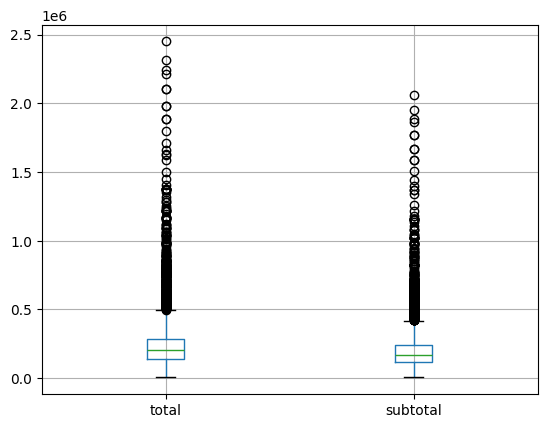

In [19]:
boxplot = df_factura_edav1.boxplot(column=['total', 'subtotal'])
#plt.show


Con el diagrama encuentro que los datos estan muy dispersos, porque hay muchos valores por fuera de los intercuartiles, sin embargo, tiene sentido en relacion a la empresa. Los datos en lo relativo al total y al subtotal refleja coherencia, y ningun de los valores son negativos.

# Revision de algunas hipotesis


Queria conocer la relacion del descuento pronto pago con las ventas de la empresa, para esto requiero validar el dia en el que se generó la factura y la fecha en la que dicha factura fue pagada. Para esto se realizará el analisis de los campos fechas y valores pagados. 

In [20]:
print(len(df_factura_edav1[pd.isnull(df_factura_eda.fecha_pago)]))
print(len(df_factura_edav1[pd.isnull(df_factura_eda.pronto_pago)]))


4823
398


/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_8472/1507800098.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df_factura_edav1[pd.isnull(df_factura_eda.fecha_pago)]))
/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_8472/1507800098.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(df_factura_edav1[pd.isnull(df_factura_eda.pronto_pago)]))


La columna de fecha pago se encuentra completamente nula, razon por la cual no se tendra en cuenta para el analisis

In [21]:
df_factura_edav1.drop(labels=['fecha_pago'],axis=1, inplace=True)

/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_8472/599864690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factura_edav1.drop(labels=['fecha_pago'],axis=1, inplace=True)


In [22]:
df_factura_edav1[df_factura_edav1['pronto_pago']==df_factura_edav1['pronto_pago'].max()]

,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,pronto_pago,subtotal,total,iva,fecha_fe,name,category
1950,7357,2022-04-06,2022-05-05,77,1,2,3,0,1.0,170000.0,202300.0,32300.0,2022-04-07,EDIFICIO MARTINICA,Unidades Residenciales
2358,6833,2022-02-12,2022-03-12,196,1,2,3,0,1.0,117900.0,140301.0,22401.0,2022-02-14,EDIFICIO ALBORADA PROPIEDAD HORIZONTAL,Unidades Residenciales
2724,6802,2022-02-09,2022-03-09,275,1,2,3,0,1.0,139590.0,166112.1,26522.1,2022-02-09,ORGANIZACION MEDICO ODONTOLOGICA NACIONAL INTE...,Otras Industrias
5981,9854,2023-01-14,2023-02-14,1691,1,2,3,0,1.0,107800.0,128282.0,20482.0,2023-01-17,EDIFICIO VICTORIA PH,Unidades Residenciales
6363,10299,2023-02-24,2023-03-24,743,1,2,3,0,1.0,560800.0,667352.0,106552.0,2023-02-24,C.R. OASIS DE PASOANCHO V ETAPA,Unidades Residenciales


In [23]:
df_factura_edav1[df_factura_edav1['pronto_pago']==df_factura_edav1['pronto_pago'].min()]

,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,pronto_pago,subtotal,total,iva,fecha_fe,name,category
6,7188,2022-03-16,2022-04-16,1193,1,2,3,0,0.0,171000.0,203490.0,32490.0,2022-03-16,CONJUNTO LA RESERVA VILLA RESIDENCIAL,Unidades Residenciales
11,7424,2022-04-11,2022-05-10,733,1,2,3,0,0.0,193500.0,230265.0,36765.0,2022-04-11,IDEAS ESENCIALES S.A.S.,Instituciones Educativas
12,7430,2022-04-11,2022-05-11,92,1,2,3,0,0.0,48000.0,57120.0,9120.0,2022-04-11,C.M. BOSQUES DE VIZCAYA - PH,Unidades Residenciales
14,7658,2022-05-17,2022-06-17,93,1,2,3,0,0.0,136500.0,162435.0,25935.0,2022-05-19,U.R. PALMARES DE VALLARTA,Unidades Residenciales
15,7431,2022-04-11,2022-05-10,177,1,2,3,0,0.0,340380.0,405052.2,64672.2,2022-04-11,PRODUCTOS DIFFER S.A.S,Otras Industrias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,12361,2023-10-07,2023-10-28,516,1,2,3,0,0.0,27800.0,33082.0,5282.0,2023-10-11,ORGANIZACION RADIAL OLIMPICA S.A,Otras Industrias
8613,12354,2023-10-07,2023-10-28,3361,1,2,3,0,0.0,78750.0,93712.5,14962.5,2023-10-11,FELIPE ALEJANDRO IBARRA JARAMILLO,Industria de Servicos
8615,12353,2023-10-07,2023-11-07,220,1,2,3,0,0.0,116800.0,138992.0,22192.0,2023-10-11,FUNDACION SERVICIOS INTEGRALES PARA LA MUJER ...,Hogar
8616,12345,2023-10-06,2023-10-27,3917,1,2,3,0,0.0,108000.0,128520.0,20520.0,2023-10-11,CORPORACION COLOMBIA SOCIAL Y RURAL,Otras Industrias


Dado que no tenemos la informacion de fecha pago y que la variable pronto pago es una variable categorica, no podemos identificar cuantos clientes tomas este descuento y con esto la relacion de las ventas, razon por la cual no continuaremos explorando esta información. 

In [24]:
print(len(df_factura_edav1[pd.isnull(df_factura_edav1.subtotal)]))
df_factura_edav1[pd.isnull(df_factura_edav1.subtotal)]

4


,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,pronto_pago,subtotal,total,iva,fecha_fe,name,category
6668,12622,2023-11-10,2023-12-10,77,1,0,1,0,NaN,NaN,NaN,NaN,NaT,EDIFICIO MARTINICA,Unidades Residenciales
6686,12627,2023-11-11,2023-12-10,579,1,0,1,0,NaN,NaN,NaN,NaN,NaT,PROCESADORA DE ALIMENTOS EL MAGUEY,Industria de Alimentos
6691,12633,2023-11-14,2023-11-30,555,1,0,1,0,NaN,NaN,NaN,NaN,NaT,LABORATORIOS SERES S.A.S,Otras Industrias
6692,12632,2023-11-11,2023-12-30,2913,1,0,1,0,NaN,NaN,NaN,NaN,NaT,EDIFICIO CENTRO MEDICO ESPECIALIZADO UNIR PROP...,Industria de Saud


In [25]:
df_factura_edav1[df_factura_edav1['subtotal']==df_factura_edav1['subtotal'].max()]

,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,pronto_pago,subtotal,total,iva,fecha_fe,name,category
7648,11028,2023-05-16,2023-06-16,78,1,2,3,0,0.0,2058200.0,2449258.0,391058.0,2023-05-16,MUNDO MADERAS DE COLOMBIA S.A.S.,Otras Industrias


In [26]:
df_factura_edav1[df_factura_edav1['subtotal']==df_factura_edav1['subtotal'].min()]

,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,pronto_pago,subtotal,total,iva,fecha_fe,name,category
5883,8625,2022-09-05,2022-11-05,1664,1,2,3,0,0.0,4000.0,4760.0,760.0,2022-09-15,OPERADORA DE ESTACIONES DE COMBUSTIBLES Y DERI...,Industria de Servicos


Se hace una revision de los valores totales, subtotales con el fin de validar que no se tengan datos nulos o valores con error

In [27]:
print(len(df_factura_edav1[pd.isnull(df_factura_edav1.total)]))
df_factura_edav1[pd.isnull(df_factura_edav1.total)]

4


,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,pronto_pago,subtotal,total,iva,fecha_fe,name,category
6668,12622,2023-11-10,2023-12-10,77,1,0,1,0,NaN,NaN,NaN,NaN,NaT,EDIFICIO MARTINICA,Unidades Residenciales
6686,12627,2023-11-11,2023-12-10,579,1,0,1,0,NaN,NaN,NaN,NaN,NaT,PROCESADORA DE ALIMENTOS EL MAGUEY,Industria de Alimentos
6691,12633,2023-11-14,2023-11-30,555,1,0,1,0,NaN,NaN,NaN,NaN,NaT,LABORATORIOS SERES S.A.S,Otras Industrias
6692,12632,2023-11-11,2023-12-30,2913,1,0,1,0,NaN,NaN,NaN,NaN,NaT,EDIFICIO CENTRO MEDICO ESPECIALIZADO UNIR PROP...,Industria de Saud


In [28]:
df_factura_edav1[df_factura_edav1['total']==df_factura_edav1['total'].max()]

,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,pronto_pago,subtotal,total,iva,fecha_fe,name,category
7648,11028,2023-05-16,2023-06-16,78,1,2,3,0,0.0,2058200.0,2449258.0,391058.0,2023-05-16,MUNDO MADERAS DE COLOMBIA S.A.S.,Otras Industrias


In [29]:
df_factura_edav1[df_factura_edav1['total']==df_factura_edav1['total'].min()]

,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,pronto_pago,subtotal,total,iva,fecha_fe,name,category
5883,8625,2022-09-05,2022-11-05,1664,1,2,3,0,0.0,4000.0,4760.0,760.0,2022-09-15,OPERADORA DE ESTACIONES DE COMBUSTIBLES Y DERI...,Industria de Servicos


In [30]:
print(len(df_factura_edav1[pd.isnull(df_factura_edav1.iva)]))
df_factura_edav1[pd.isnull(df_factura_edav1.iva)]

5


,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,pronto_pago,subtotal,total,iva,fecha_fe,name,category
4499,8279,2022-07-30,2022-08-30,3253,1,2,3,0,0.0,225000.0,225000.0,NaN,2022-08-18,C.R. LA HACIENDA MANZANA 4,Unidades Residenciales
6668,12622,2023-11-10,2023-12-10,77,1,0,1,0,NaN,NaN,NaN,NaN,NaT,EDIFICIO MARTINICA,Unidades Residenciales
6686,12627,2023-11-11,2023-12-10,579,1,0,1,0,NaN,NaN,NaN,NaN,NaT,PROCESADORA DE ALIMENTOS EL MAGUEY,Industria de Alimentos
6691,12633,2023-11-14,2023-11-30,555,1,0,1,0,NaN,NaN,NaN,NaN,NaT,LABORATORIOS SERES S.A.S,Otras Industrias
6692,12632,2023-11-11,2023-12-30,2913,1,0,1,0,NaN,NaN,NaN,NaN,NaT,EDIFICIO CENTRO MEDICO ESPECIALIZADO UNIR PROP...,Industria de Saud


In [31]:
df_factura_edav1[df_factura_edav1['iva']==df_factura_edav1['iva'].max()]

,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,pronto_pago,subtotal,total,iva,fecha_fe,name,category
7648,11028,2023-05-16,2023-06-16,78,1,2,3,0,0.0,2058200.0,2449258.0,391058.0,2023-05-16,MUNDO MADERAS DE COLOMBIA S.A.S.,Otras Industrias


In [32]:
df_factura_edav1[df_factura_edav1['iva']==df_factura_edav1['iva'].min()]

,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,pronto_pago,subtotal,total,iva,fecha_fe,name,category
1927,5621,2021-09-27,2021-10-15,1797,1,2,3,0,0.0,225000.0,225000.0,0.0,2021-10-08,BEATRIZ ELENA HURTADO VILLAR,Industria de Servicos
2098,5362,2021-08-12,2021-09-30,513,1,2,3,0,0.0,156000.0,156000.0,0.0,2021-09-24,C.R. VERDE CANEY,Unidades Residenciales
2253,6148,2021-11-13,2021-12-13,2872,1,2,3,0,0.0,156000.0,156000.0,0.0,2021-11-20,PARCELACION CAMPESTRE EL CARMELO PH,Unidades Residenciales
2717,6664,2022-01-27,2022-02-28,1639,1,2,3,0,0.0,225000.0,225000.0,0.0,2022-02-08,EDIFICIO BONAIRE,Unidades Residenciales
2752,6087,2021-11-16,2021-12-16,275,1,2,3,0,0.0,156000.0,156000.0,0.0,2021-11-18,ORGANIZACION MEDICO ODONTOLOGICA NACIONAL INTE...,Otras Industrias
3221,4347,2021-05-15,2021-06-01,169,1,1,0,0,0.0,218700.0,218700.0,0.0,2021-05-15,C.R. TORRES DEL ALFEREZ I,Unidades Residenciales
5890,9143,2022-10-25,2022-11-25,513,1,2,3,0,0.0,170000.0,170000.0,0.0,2022-12-26,C.R. VERDE CANEY,Unidades Residenciales
6411,12472,2023-10-21,2023-11-04,1553,1,2,3,0,0.0,38000.0,38000.0,0.0,2023-10-26,EDIFICIO PROVENZA,Unidades Residenciales
8152,11853,2023-08-17,2023-09-17,723,1,2,3,0,0.0,170000.0,170000.0,0.0,2023-08-19,CORGIL S.A.S,Otras Industrias
8172,6622,2022-01-24,2022-02-24,752,1,2,3,0,0.0,285000.0,285000.0,0.0,2022-01-25,C.R. QUINTAS DE MALLORCA,Unidades Residenciales


Para disminuir la cantidad de valores nulos, vamos a filtrar por las facturas que tengan en su status las categorias diferentes de 0, es decir, anuladas y el uso diferente a 0, es decir, las facturas que estan en proceso de realizarse. 

In [33]:
df_factura_edav2=df_factura_edav1[df_factura_edav1['status']!='0']


In [34]:
df_factura_edav2=df_factura_edav2[df_factura_edav2['uso']!='0']

In [35]:
print(len(df_factura_edav2[pd.isnull(df_factura_edav2.total)]))
print(len(df_factura_edav2[pd.isnull(df_factura_edav2.subtotal)]))
print(len(df_factura_edav2[pd.isnull(df_factura_edav2.iva)]))

0
0
1


Despues de aplicados los filtros tengo el total y subtotal ajustado, y ahora voy a revisar la relacion con la fecha que en este caso sera fecha fe, que es la fecha de la facturacion electronica

In [36]:
print(len(df_factura_edav2[pd.isnull(df_factura_edav2.fecha_fe)]))

0


In [37]:
df_factura_edav2[df_factura_edav2['fecha_fe']==df_factura_edav2['fecha_fe'].max()]

,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,pronto_pago,subtotal,total,iva,fecha_fe,name,category
6671,12618,2023-11-10,2023-12-10,852,1,2,1,0,NaN,159000.0,189210.0,30210.0,2023-11-10,CONJUNTO MULTIFAMILIAR VILLA MARCELA,Unidades Residenciales
6672,12617,2023-11-09,2023-12-09,538,1,2,1,0,NaN,650000.0,773500.0,123500.0,2023-11-10,C.R. MIRADOR DE TERRAZAS,Unidades Residenciales


In [38]:
df_factura_edav2[df_factura_edav2['fecha_fe']==df_factura_edav2['fecha_fe'].min()]

,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,pronto_pago,subtotal,total,iva,fecha_fe,name,category
250,3147,2021-01-05,2021-01-31,73,1,2,3,0,0.0,178000.0,211820.0,33820.0,2021-01-06,EDIFICIO ALQUERIA PROPIEDAD HORIZONTAL,Unidades Residenciales
251,3143,2021-01-05,2021-01-31,169,1,2,3,0,0.0,330000.0,392700.0,62700.0,2021-01-06,C.R. TORRES DEL ALFEREZ I,Unidades Residenciales
254,3146,2021-01-05,2021-01-31,740,1,2,3,0,0.0,1020000.0,1213800.0,193800.0,2021-01-06,C.R RESERVA DE CRISTALES,Unidades Residenciales
1780,3145,2021-01-05,2021-01-31,348,1,2,3,0,0.0,171900.0,204561.0,32661.0,2021-01-06,C.R. PORTAL DE LA ALAMEDA DOS - PH,Unidades Residenciales


Una vez relizada la limpieza y analisis de los datos, quiero identificar el comportamiento de las ventas por año, mes y dia. Sin embargo, empezare agrupando por mes y año y posteriormente por dia

In [39]:
df_factura_edav2['Month'] = pd.DatetimeIndex(df_factura_edav2['fecha_fe']).month
df_factura_edav2['Year'] = pd.DatetimeIndex(df_factura_edav2['fecha_fe']).year

In [40]:
df_factura_edav2

,id,fecha,vencimiento,client_id,facturable,uso,status,valor_pagado,pronto_pago,subtotal,total,iva,fecha_fe,name,category,Month,Year
6,7188,2022-03-16,2022-04-16,1193,1,2,3,0,0.0,171000.0,203490.0,32490.0,2022-03-16,CONJUNTO LA RESERVA VILLA RESIDENCIAL,Unidades Residenciales,3,2022
11,7424,2022-04-11,2022-05-10,733,1,2,3,0,0.0,193500.0,230265.0,36765.0,2022-04-11,IDEAS ESENCIALES S.A.S.,Instituciones Educativas,4,2022
12,7430,2022-04-11,2022-05-11,92,1,2,3,0,0.0,48000.0,57120.0,9120.0,2022-04-11,C.M. BOSQUES DE VIZCAYA - PH,Unidades Residenciales,4,2022
13,7656,2022-05-17,2022-06-17,525,1,2,4,0,NaN,505400.0,601426.0,96026.0,2022-05-19,ACCORHOTELS COLOMBIA S.A,Otras Industrias,5,2022
14,7658,2022-05-17,2022-06-17,93,1,2,3,0,0.0,136500.0,162435.0,25935.0,2022-05-19,U.R. PALMARES DE VALLARTA,Unidades Residenciales,5,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,12354,2023-10-07,2023-10-28,3361,1,2,3,0,0.0,78750.0,93712.5,14962.5,2023-10-11,FELIPE ALEJANDRO IBARRA JARAMILLO,Industria de Servicos,10,2023
8614,12349,2023-10-07,2023-11-07,260,1,2,1,0,NaN,142200.0,169218.0,27018.0,2023-10-13,INVERCERAMICAS S.A.S,Otras Industrias,10,2023
8615,12353,2023-10-07,2023-11-07,220,1,2,3,0,0.0,116800.0,138992.0,22192.0,2023-10-11,FUNDACION SERVICIOS INTEGRALES PARA LA MUJER ...,Hogar,10,2023
8616,12345,2023-10-06,2023-10-27,3917,1,2,3,0,0.0,108000.0,128520.0,20520.0,2023-10-11,CORPORACION COLOMBIA SOCIAL Y RURAL,Otras Industrias,10,2023


In [41]:
df_factura_edav2.groupby(['Month', 'Year']).agg({'total': sum})

/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_8472/528052942.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_factura_edav2.groupby(['Month', 'Year']).agg({'total': sum})


total
Month Year              
1     2021  2.522064e+07
      2022  1.556184e+07
      2023  3.276071e+07
2     2021  4.291075e+07
      2022  3.879803e+07
      2023  3.862706e+07
3     2021  3.380606e+07
      2022  3.066883e+07
      2023  3.565666e+07
4     2021  2.690062e+07
      2022  3.041256e+07
      2023  2.571121e+07
5     2021  2.143428e+07
      2022  2.578524e+07
      2023  4.286147e+07
6     2021  3.258732e+07
      2022  2.931257e+07
      2023  4.354497e+07
7     2021  3.241345e+07
      2022  2.891919e+07
      2023  3.189639e+07
8     2021  4.031756e+07
      2022  4.057463e+07
      2023  3.465949e+07
9     2021  4.399236e+07
      2022  4.351719e+07
      2023  4.952588e+07
10    2021  3.416581e+07
      2022  2.783437e+07
      2023  4.711253e+07
11    2021  3.798509e+07
      2022  4.496920e+07
      2023  2.238065e+07
12    2021  4.349478e+07
      2022  2.356083e+07

In [43]:
facturas_años = df_factura_edav2.groupby(['Month', 'Year']).agg({'total': 'sum'}).reset_index()

Para visualizar la relacion de las ventas por cada mes en cada año quiero usar un grafico que me permita ver la comparacion

/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_8472/2350108277.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = plt.cm.get_cmap('tab10', len(facturas_años['Year'].unique()))


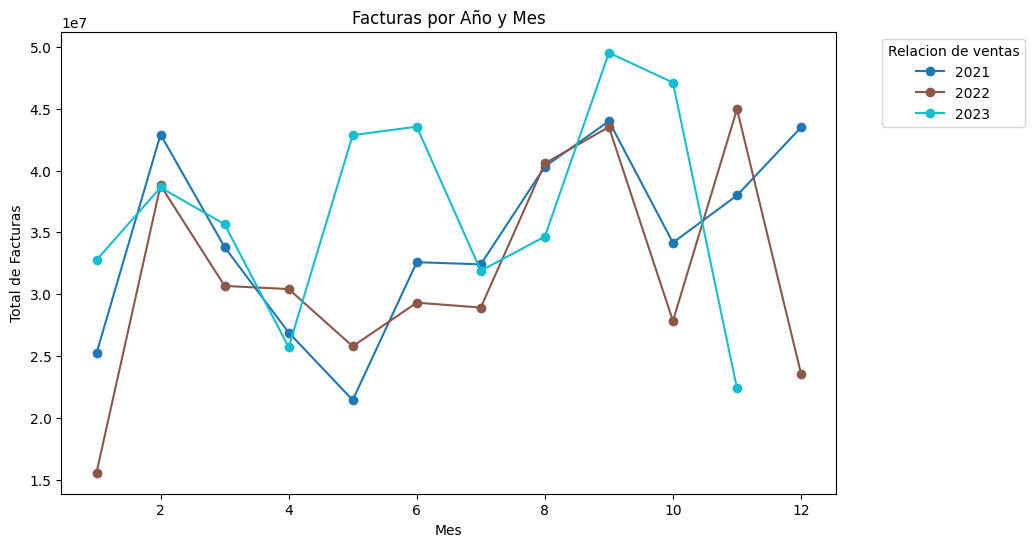

In [46]:

fig, ax = plt.subplots(figsize=(10, 6))
colores = plt.cm.get_cmap('tab10', len(facturas_años['Year'].unique()))
for i, (year, group) in enumerate(facturas_años.groupby('Year')):
    color = colores(i)
    ax.plot(group['Month'], group['total'], label=str(year), color=color, marker='o')
ax.set_xlabel('Mes')
ax.set_ylabel('Total de Facturas')
ax.set_title('Facturas por Año y Mes')
ax.legend(title='Relacion de ventas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Adicionalmente quiero conocer como se distribuyen los clientes por la categoria y las ventas que representan cada categoria

In [57]:
print(len(df_factura_edav2[pd.isnull(df_factura_edav2.category)]))

0


In [58]:
df_factura_edav2.groupby(['category']).size().reset_index(name='clientes por categoria')


,category,clientes por categoria
0,Hogar,74
1,Industria Hotelera,51
2,Industria de Alimentos,103
3,Industria de Saud,176
4,Industria de Servicos,298
5,Instituciones Educativas,62
6,Otras Industrias,1552
7,Unidades Residenciales,2472


In [59]:
df_factura_edav2.groupby(['category']).agg({'total':sum})

/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_8472/740900197.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_factura_edav2.groupby(['category']).agg({'total':sum})


,total
category,
Hogar,1.085764e+07
Industria Hotelera,1.238854e+07
Industria de Alimentos,1.985659e+07
Industria de Saud,5.211823e+07
Industria de Servicos,5.878590e+07
Instituciones Educativas,1.801449e+07
Otras Industrias,3.820110e+08
Unidades Residenciales,6.458478e+08


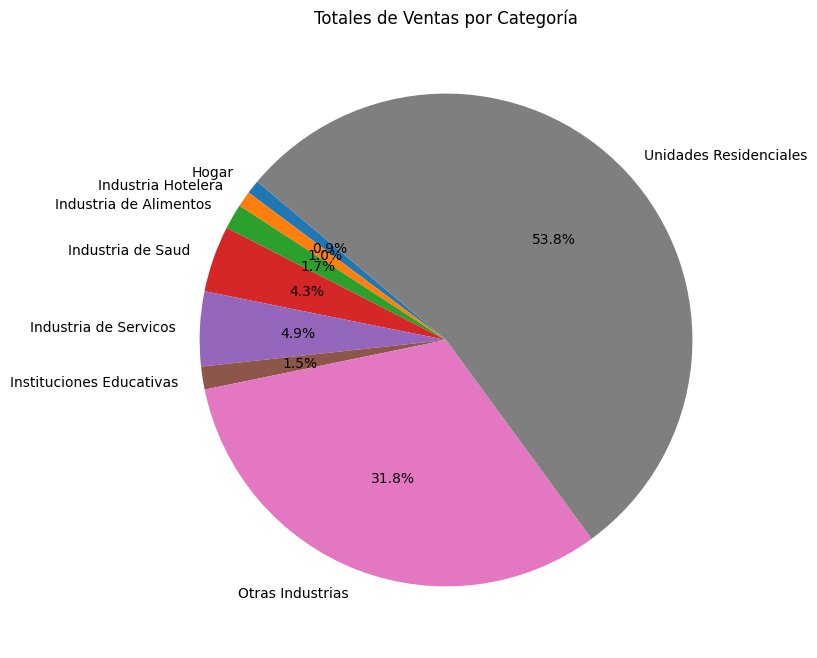

In [60]:
ventas_por_categoria = df_factura_edav2.groupby('category').agg({'total': 'sum'}).reset_index()

plt.figure(figsize=(8, 8))
plt.pie(ventas_por_categoria['total'], labels=ventas_por_categoria['category'], autopct='%1.1f%%', startangle=140)
plt.title('Totales de Ventas por Categoría')
plt.show()

Para conocer el comportamiento de las ventas por categoria en cada uno de los años, voy a realizar tres graficos de pastel y ver la porcion de las ventas para cada uno de los años

In [61]:
categoria_ano = df_factura_edav2.groupby(['Year','category']).agg({'total': 'sum'}).reset_index()
#facturas_años = df_factura_edav2.groupby(['Month', 'Year']).agg({'total': 'sum'}).reset_index()

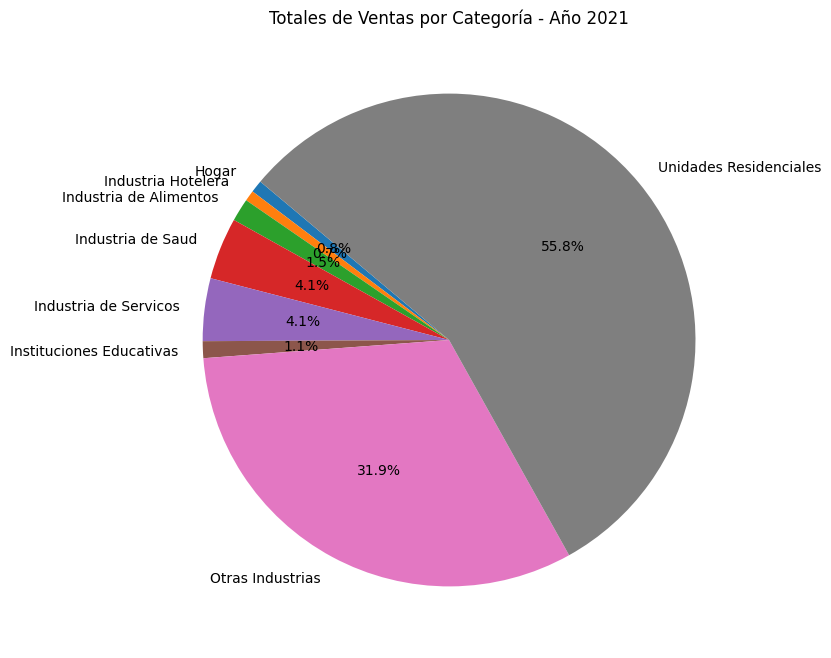

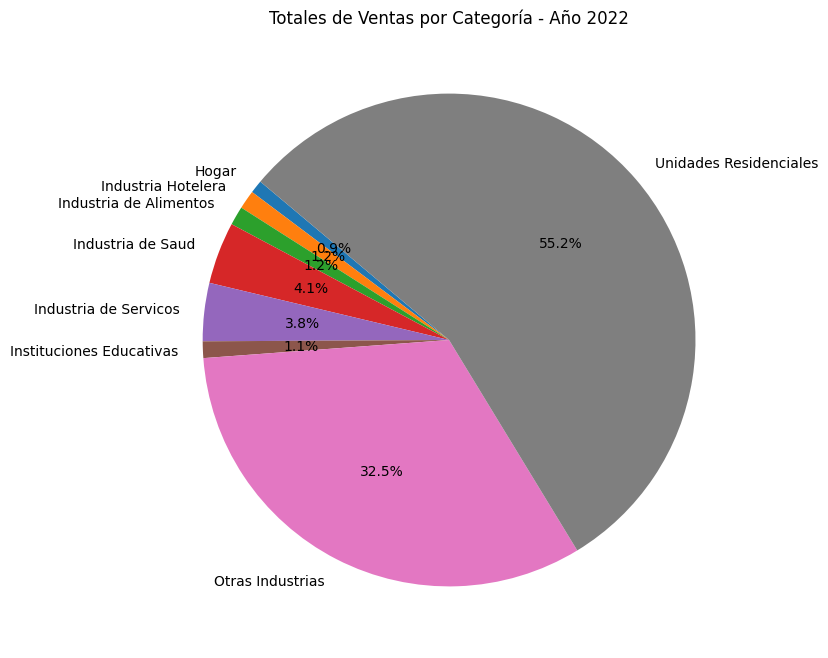

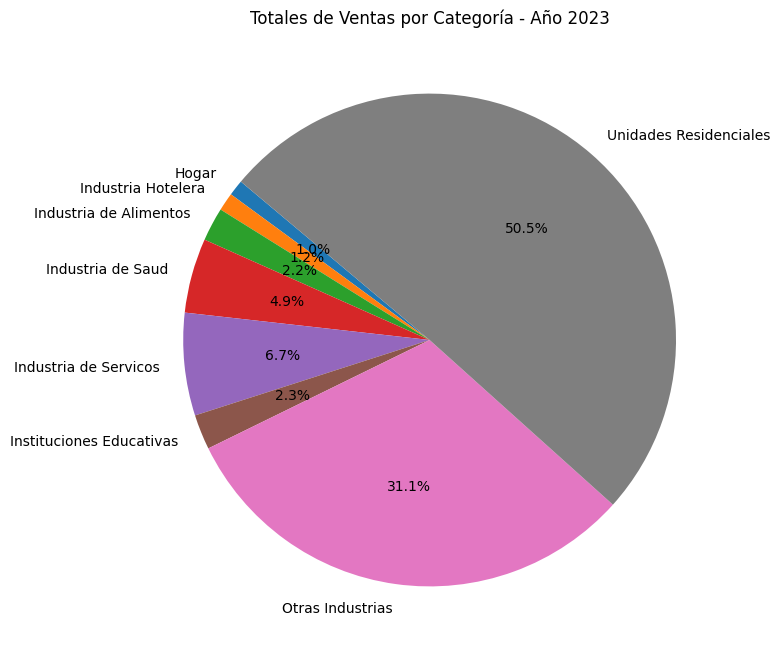

In [55]:
años = categoria_ano['Year'].unique()

for año in años:
    datos_año = categoria_ano[categoria_ano['Year'] == año]

    # Crear un gráfico de pastel
    plt.figure(figsize=(8, 8))
    plt.pie(datos_año['total'], labels=datos_año['category'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Totales de Ventas por Categoría - Año {año}')
    plt.show()

# Modelar Datos

Para estimar las ventas del mes siguiente es importante la relacion entre la fecha de la facturacion y el total antes de impuestos. Dado que buscamos predecir las ventas del mes siguiente vamos a usar un polinomio con diferentes grados para hacer la estimacion de las ventas. Para esto vamos a agrupas las ventas por fecha, vamos a revisar el compartamiento de los datos, y realizar la limpieza si presenta algun nulo o algun valor con error. 

In [63]:
df_factura_edav2.groupby(['fecha_fe']).agg({'subtotal': sum})

/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_8472/1551666367.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_factura_edav2.groupby(['fecha_fe']).agg({'subtotal': sum})


,subtotal
fecha_fe,
2021-01-06,1699900.0
2021-01-07,171900.0
2021-01-15,639000.0
2021-01-16,139500.0
2021-01-19,2338670.0
...,...
2023-11-03,2243950.0
2023-11-07,1449675.0
2023-11-08,463500.0


In [64]:
df_vta_diaria = df_factura_edav2.groupby(['fecha_fe'], as_index=False).agg({'subtotal': 'sum'})

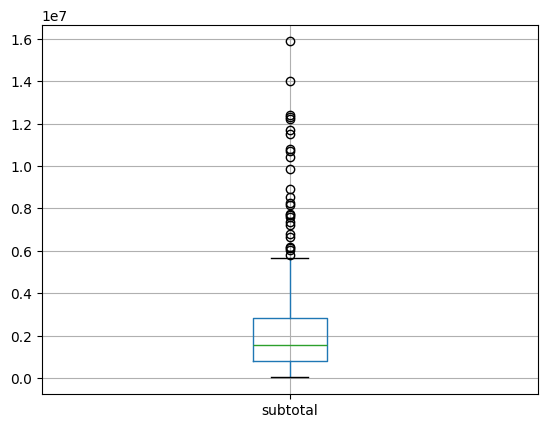

In [65]:
boxplot = df_vta_diaria.boxplot(column=['subtotal'])

Se validan los datos minimos y maximos, y se comprueba que los datos presentan valores coherentes

In [51]:
df_vta_diaria[df_vta_diaria['subtotal']==df_vta_diaria['subtotal'].min()]

,fecha_fe,subtotal
242,2022-06-09,22300.0


In [52]:
df_vta_diaria[df_vta_diaria['subtotal']==df_vta_diaria['subtotal'].max()]

,fecha_fe,subtotal
115,2021-08-25,15881020.0


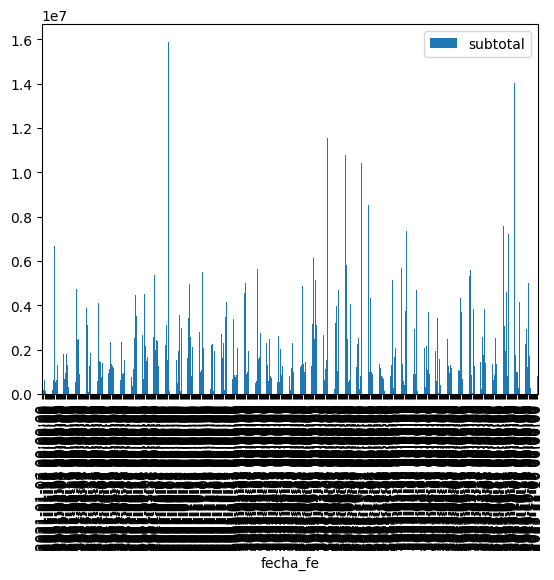

In [53]:
histograma =df_vta_diaria.plot.bar(x='fecha_fe',y='subtotal')
histograma.plot()
plt.show()

Con este histograma de las fechas se logra percibir la diferencia de los valores entre cada una de las fechas, al igual que en el grafico de cajas y bigotes, la dispersion de los datos es muy alta

Para realizar el modelo logaritmico, vamos a combinar las celdas de la fecha por año y mes

In [54]:
df_vta_diaria = df_factura_edav2.groupby(['fecha_fe'], as_index=False).agg({'subtotal': 'sum'})
df_vta_diaria['fecha_fe'] = df_vta_diaria['fecha_fe'].apply(lambda x: int(str(x.strftime('%Y'))+str(x.strftime('%m'))))
df_vta_diaria = df_vta_diaria.groupby(['fecha_fe'], as_index=False).agg({'subtotal': 'sum'})
df_vta_diaria['subtotal'] = df_vta_diaria['subtotal'].astype(int)
df_vta_diaria

,fecha_fe,subtotal
0,202101,21193815
1,202102,36059450
2,202103,28408456
3,202104,22605565
4,202105,18012000
5,202106,27384304
6,202107,27238192
7,202108,33880300
8,202109,36993273
9,202110,28746688


Antes de realizar el modelo matematico, vamos a definir la funcion f(x) de la siguientes forma: 

In [57]:
def fx (x1, coef):
    fx = 0
    n = len(coef) - 1
    for p in coef:
        fx = fx + p*x1**n
        n = n - 1
    return fx

Para el modelo solo vamos a usar los datos del año 2023

In [58]:
df_vta_diaria_v1 = df_vta_diaria[(df_vta_diaria['fecha_fe'] >= 202301) & (df_vta_diaria['fecha_fe'] < 202311)]
x = df_vta_diaria_v1['fecha_fe'].values
y = df_vta_diaria_v1['subtotal'].values

<Axes: >

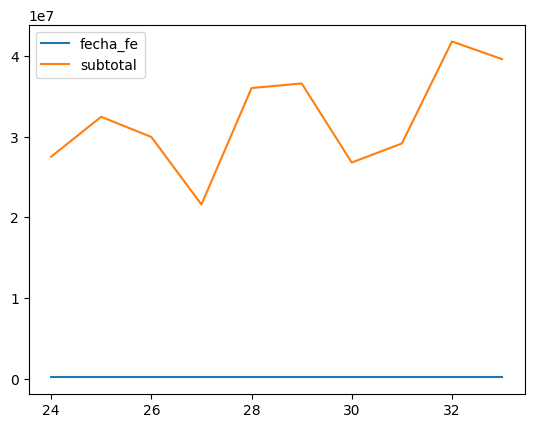

In [59]:
df_vta_diaria_v1.plot()

In [60]:
df_vta_diaria_v1

,fecha_fe,subtotal
24,202301,27530009
25,202302,32459714
26,202303,29963580
27,202304,21606055
28,202305,36018045
29,202306,36592410
30,202307,26803690
31,202308,29158355
32,202309,41782842
33,202310,39596425


Se usa el grado 12 para realizar la prediccion, pues es el grado con menor error que se encontro despues de realizar el loop y validar con otros grados.

In [62]:
i=12
mes = 202311
coef = np.polyfit(x,y,i)
p = np.polyval(coef, mes)
print(f"para grado {i} la prediccion es {p}")


para grado 12 la prediccion es 47009792.0


/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_8209/936484169.py:3: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)


In [110]:
mes = 202312
grado = np.arange(0, 30 + 1, 1) #de 0 a 100 de 1 en 1
aproxi = np.array([])
y_pred_vec = np.array([])
MSE_vec = []
for i in grado:
    coef = np.polyfit(x,y,i)
    p = np.polyval(coef, mes)
    aproxi = np.append(aproxi, p)
    
    # para la MSE
    y_pred_vec = np.array([])
    for j in x: # para la MSE
        y_pred = np.polyval(coef, j)
        y_pred_vec = np.append(y_pred_vec,y_pred)
    #print(f"los y: {y}")
    #print(f"los y_aprox: {y_pred_vec}")
    MSE = (sum( (y - y_pred_vec)**2 ))/len(y)
    MSE_vec.append(MSE)
    print(f"Para grado {i} El MSE es: {MSE}")
min(MSE_vec)


Para grado 0 El MSE es: 35786607523457.85
Para grado 1 El MSE es: 25302882668754.9
Para grado 2 El MSE es: 22888725949288.0
Para grado 3 El MSE es: 22888714546032.125
Para grado 4 El MSE es: 22888697118288.477
Para grado 5 El MSE es: 22888682426259.812
Para grado 6 El MSE es: 22888668130724.207
Para grado 7 El MSE es: 22254221033738.1
Para grado 8 El MSE es: 22261373818736.5
Para grado 9 El MSE es: 22244732088586.1
Para grado 10 El MSE es: 22233533565194.1
Para grado 11 El MSE es: 22233521176022.9
Para grado 12 El MSE es: 22230339254128.5
Para grado 13 El MSE es: 22244794026045.3
Para grado 14 El MSE es: 22234174053437.3
Para grado 15 El MSE es: 22239952663818.1
Para grado 16 El MSE es: 22235294825635.7
Para grado 17 El MSE es: 22238591275581.3
Para grado 18 El MSE es: 22237191831510.9
Para grado 19 El MSE es: 22237727505622.9
Para grado 20 El MSE es: 22236651288944.5
Para grado 21 El MSE es: 22238428631818.1
Para grado 22 El MSE es: 22237328043350.9
Para grado 23 El MSE es: 2223619793

/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_1483/1169698976.py:7: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)
/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_1483/1169698976.py:7: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)
/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_1483/1169698976.py:7: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)
/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_1483/1169698976.py:7: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)
/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_1483/1169698976.py:7: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)
/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_1483/1169698976.py:7: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,i)
/var/folders/x5/k5dfjx8x03j65qdgzd0k20wr0000gn/T/ipykernel_1483/116969

22230339254128.5

Aunque el grado de error sigue siendo bastante alto, y despues de haberse filtrado por menos cantidad de datos, y no tenerse en cuenta el mes de noviembre, el limitante de tiempo limita el alcance del mismo.